# Project Title: Identifying Pulsar Candidates through Machine Learning Classification with Ensemble Methods

**NAME**: Hazman Naim Bin Ahsan

**CLASS**: GA-DSBC-23-003

------

# Introduction
## Problem Statement
Pulsars, or rotating neutron stars, are incredibly dense celestial objects that emit regular pulses of radiation. Identifying these pulsars is a crucial task in astrophysics, aiding our understanding of the universe. The process of sifting through a pool of pulsar candidates is not only time-consuming but also prone to human errors. The traditional methods for identifying pulsars are inefficient and may overlook potential discoveries. To address this issue, we aim to leverage machine learning and ensemble methods to enhance the accuracy of pulsar candidate classification.

## Objectives
1. Data Collection and Preparation:

- Gather a comprehensive dataset of pulsar candidates and relevant astrophysical features.
- Preprocess the data, including handling missing values, duplicates and standardization, to create a high-quality dataset for training and testing the machine learning models.

2. Model Selection and Development:

- Explore various machine learning classification algorithms, including logistic regression, random forests,and gradient boosting algorithms.
- Develop and train machine learning models on the prepared dataset.
- Experiment with ensemble methods to combine the strengths of multiple models for improved classification accuracy.

3. Model Evaluation and Optimization:

- Evaluate the performance of the developed models using appropriate metrics such as accuracy, precision, recall, F1 score and log loss.
- Optimize the models through hyperparameter tuning to maximize their ability to accurately classify pulsar candidates.
- Assess the models' generalization performance through cross-validation and ensure their robustness in classifying unseen data.

<div style="display: flex; justify-content: center;">
    <div style="margin: 10px;">
        <img src="https://th.bing.com/th/id/R.5cead84a619f1242064594e24eac3e36?rik=GOiYHgnR5OlgAw&riu=http%3a%2f%2feinstein.phys.uwm.edu%2fradiopulsar%2fhtml%2fimg%2frotns.gif&ehk=ICe4a1zB0y9xux%2f1SYwMEdstB4t80GLEG0ocDPmKEiQ%3d&risl=&pid=ImgRaw&r=0" width="215px" />
        <figcaption>Image 1: Animation of pulsar.</figcaption>
    </div>
    <div style="margin: 10px;">
        <img src="https://forcetoknow.com/wp-content/uploads/2012/02/Pulsar_forcetoknow.com_.jpg" width="250px" /> 
        <figcaption>Image 2: Artist rendering of pulsar.</figcaption>
    </div>
</div>


## What are we even looking at ?

<div style="display: flex; justify-content: center;">
    <div style="margin: 10px;">
        <img src="https://th.bing.com/th/id/OIP.F0xd5BFfZZio8tErMlZk9wHaJa?pid=ImgDet&w=2666&h=3386&rs=1" width="340px" />
        <figcaption>Image 3: Dispersion Curve of Pulsar.</figcaption>
    </div>
    <div style="margin: 90px;">
        <img src="https://pa0ply.nl/images/psr23f.jpg" width="350px" /> 
        <figcaption>Image 4: DM-SNR Curve of Pulsar.</figcaption>
    </div>
</div>

## The dataset we are working with comprises the actual features extracted from the Dispersion Curve (integrated profile) and DM-SNR of pulsars.

<div style="text-align:center">
  <img src="https://allofyourbases.files.wordpress.com/2019/03/pulsar_features.png?w=1024" width="500px" />
</div>

----

# 1. Prerequisites, Libraries and Packages

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import set_config

# 2. Data Preparation

In [53]:
# Dataset for training the model
df = pd.read_csv(r'/kaggle/input/pulsar-classification-for-class-prediction/Pulsar.csv') 

Check the header both for the `df` datasets.

In [54]:
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Explaining the features in the data:

**Mean_Integrated**: This is the mean integrated pulse profile, which measures the average intensity of a pulsar's signal over a period of time.

**SD**: This is the standard deviation of the integrated pulse profile, which measures the degree of variation in the intensity of the pulsar's signal.

**EK**: This is the excess kurtosis of the integrated pulse profile, which measures the "peakedness" of the distribution of intensities.

**Skewness**: This measures the degree of asymmetry in the distribution of intensities in the integrated pulse profile.

**Mean_DMSNR_Curve**: This is the mean of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

**SD_DMSNR_Curve**: This is the standard deviation of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

**EK_DMSNR_Curve**: This is the excess kurtosis of the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

**Skewness_DMSNR_Curve**: This measures the degree of asymmetry in the curve of the integrated pulse profile's signal-to-noise ratio as a function of time.

In [55]:
print("Dataset")
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

Dataset
(17898, 9)
Number of rows: 17898
Number of columns: 9


# 3. Exploratory Data Analysis

## 3.1 Data Cleaning

Overview of the descriptive statistics of the data.

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean_Integrated,17898.0,111.079968,25.652935,5.812500,100.929688,115.078125,127.085938,192.617188
SD,17898.0,46.549532,6.843189,24.772042,42.376018,46.947479,51.023202,98.778911
EK,17898.0,0.477857,1.064040,-1.876011,0.027098,0.223240,0.473325,8.069522
Skewness,17898.0,1.770279,6.167913,-1.791886,-0.188572,0.198710,0.927783,68.101622
Mean_DMSNR_Curve,17898.0,12.614400,29.472897,0.213211,1.923077,2.801839,5.464256,223.392141
SD_DMSNR_Curve,17898.0,26.326515,19.470572,7.370432,14.437332,18.461316,28.428104,110.642211
EK_DMSNR_Curve,17898.0,8.303556,4.506092,-3.139270,5.781506,8.433515,10.702959,34.539844
Skewness_DMSNR_Curve,17898.0,104.857709,106.514540,-1.976976,34.960504,83.064556,139.309330,1191.000837
Class,17898.0,0.091574,0.288432,0.000000,0.000000,0.000000,0.000000,1.000000


Check missing values and the data type.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


* Dataset contains only numerical features.

* Dataset contain no missing values.

Check duplicates in the data.

In [58]:
df.duplicated().sum()

0

No duplicates in our dataset.

Our dataset appears to be sufficiently clean. One possible explanation is that the original dataset was cleaned by professionals before being archived. Let’s now examine the distribution of the data.

## 3.2 Data Distribution

Check the distribution between pulsar and non-pulsar.

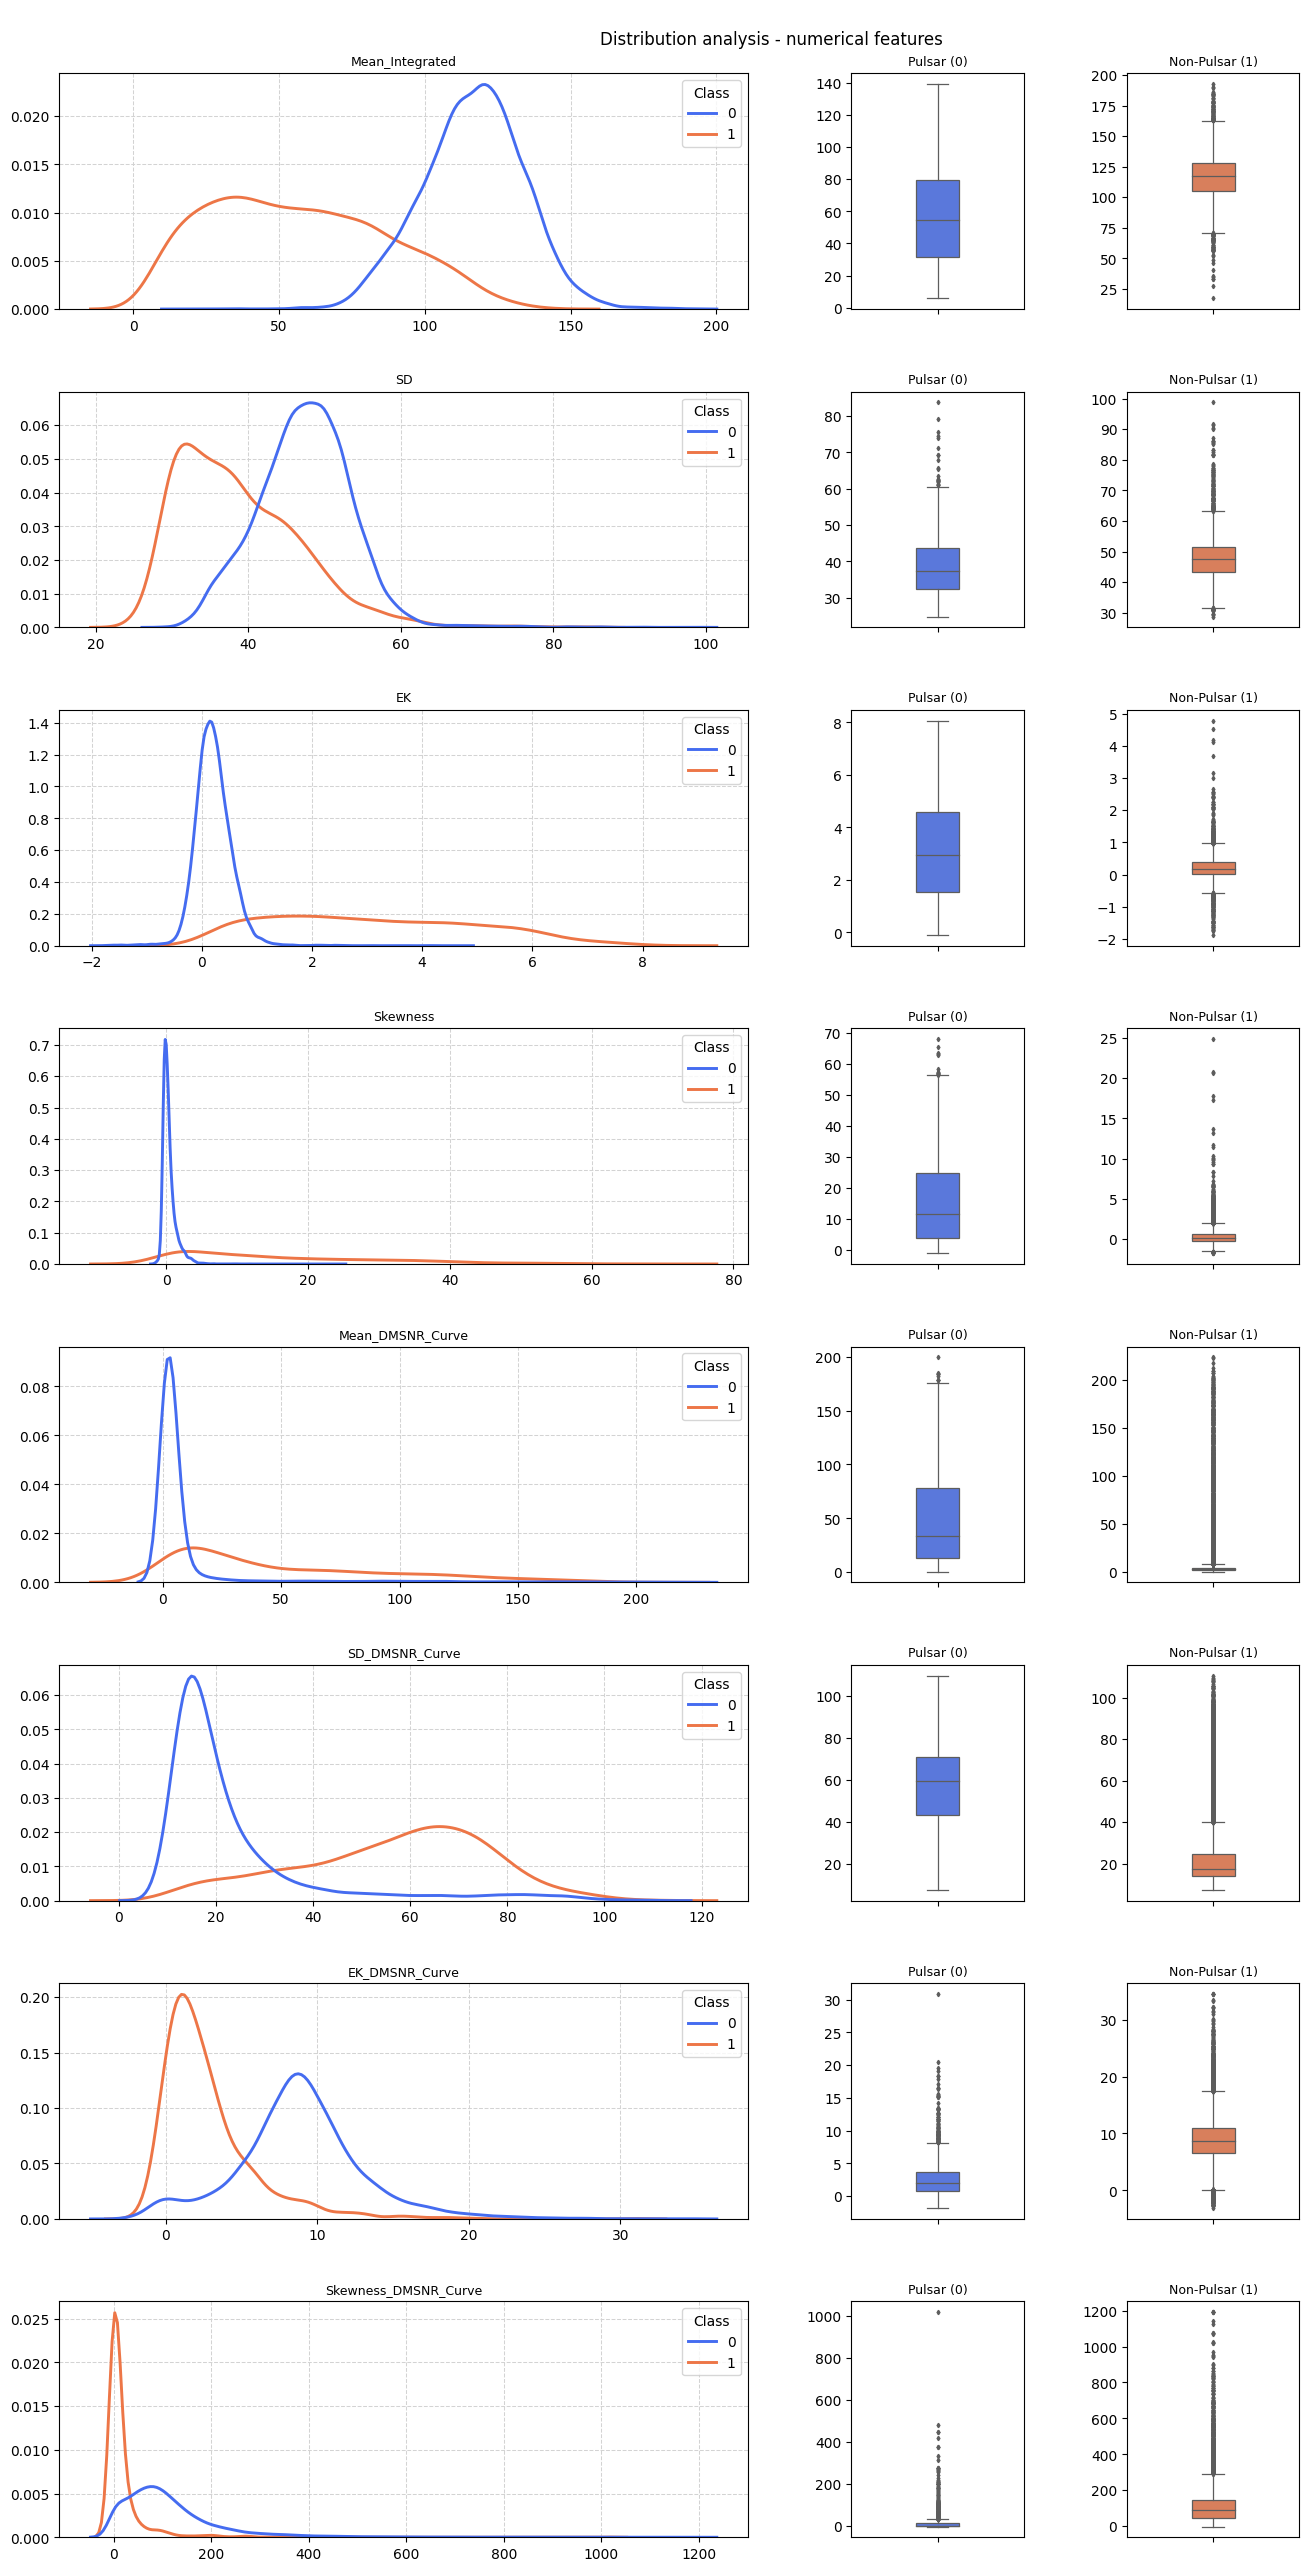

In [59]:
# dash by YANG ZHOU

num = df.select_dtypes(include=['int64','float64']).columns
num = num[:-1]

# Use of more advanced artistic matplotlib interface (see the axes)
fig, axes = plt.subplots(len(num), 3 ,figsize = (16, len(num) * 4), gridspec_kw = {'hspace': 0.35, 'wspace': 0.3, 'width_ratios': [0.80, 0.20, 0.20]})

for i,col in enumerate(num):
    ax = axes[i,0]
    sns.kdeplot(data=df, x=col, hue='Class', palette=['#456cf0', '#ed7647'], linewidth=2.1, common_norm=False, ax=ax) # Use of seaborn with artistic interface
    ax.set_title(f"\n{col}",fontsize = 9)
    ax.grid(visible=True, which = 'both', linestyle = '--', color='lightgrey', linewidth = 0.75)
    ax.set(xlabel = '', ylabel = '')

    ax = axes[i,1]
    sns.boxplot(data = df[df['Class'] == 1], y=col, width=0.25, linewidth=0.90, fliersize=2.25, color='#456cf0', ax=ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Pulsar (0)", fontsize = 9)

    ax = axes[i,2]
    sns.boxplot(data=df[df['Class'] == 0], y=col, width = 0.25, linewidth = 0.90, fliersize= 2.25, color = '#ed7647', ax = ax)
    ax.set(xlabel = '', ylabel = '')
    ax.set_title("Non-Pulsar (1)", fontsize = 9)

plt.suptitle(f'\nDistribution analysis - numerical features\n',fontsize = 12, y = 0.9, x = 0.57)
plt.show()

* Class 1 are for high values of EK, Skewness, Mean_DMSNR_Curve and Mean_DMSNR_Curve
* Class 1 and Class 0 are separated

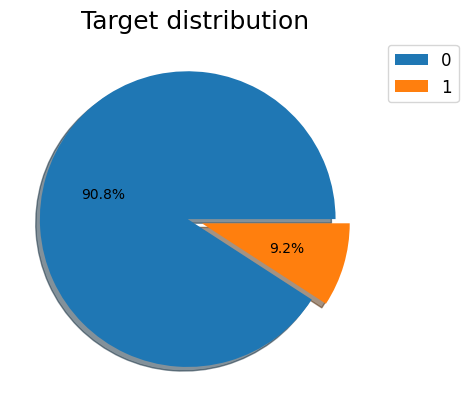

<Figure size 500x1000 with 0 Axes>

In [60]:
target_dist = df['Class'].value_counts()

plt.pie(target_dist, shadow=True, explode=[.05,.05], autopct='%.1f%%')

plt.title('Target distribution', size=18)
plt.legend(target_dist.index, loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

plt.figure(figsize=(5,10))

plt.show()

We can see above that the class distribution is quite unbalanced: about 9% of the candidates are pulsar.

## 3.3 Standardization

Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1.

$$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

num_features = ['Mean_Integrated',
                'SD',
                'EK',
                'Skewness',
                'Mean_DMSNR_Curve',
                'SD_DMSNR_Curve',
                'EK_DMSNR_Curve',
                'Skewness_DMSNR_Curve']

transformer = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_features)], remainder="passthrough")

In [62]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('num', MinMaxScaler(),
                                 ['Mean_Integrated', 'SD', 'EK', 'Skewness',
                                  'Mean_DMSNR_Curve', 'SD_DMSNR_Curve',
                                  'EK_DMSNR_Curve', 'Skewness_DMSNR_Curve'])])

# 4. Model Development

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

**USER DEFINED FUNCTIONS**

**Table to store the evaluation metrics.**

In [64]:
# Clear all table
#models_table.drop(models_table.index, inplace=True)

models_table = pd.DataFrame(columns=["Model",
                                     "Model Alias",
                                     "Detail",
                                     "Precision",
                                     "Recall",
                                     "F1-score",
                                     "Cross-Validated Accuracy",
                                     "Cross-Validated Log Loss"])

models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss


**User-defined functions for training and evaluation.**

In [65]:
def train_evaluate(model, x_train, y_train, x_test, y_test, X, Y):
    # Train the model
    model.fit(x_train, y_train)

    # Predict probabilities and labels
    prediction_prob = model.predict_proba(x_test)
    prediction = model.predict(x_test)

    # Calculate accuracy, precision, recall, F1-score, log loss
    #accuracy = model.score(x_test, y_test)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    #logloss = log_loss(y_test, prediction_prob)

    # Perform cross-validation on the test data and calculate mean accuracy and log loss
    log_losses = -cross_val_score(model, X, Y, cv=5, scoring='neg_log_loss')
    accuracies = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    avg_log_loss = log_losses.mean()
    cross_val_accuracy = accuracies.mean()

    # Print the evaluation metrics
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Cross-Validated Accuracy: {cross_val_accuracy:.4f}")
    print(f"Cross-Validated Log Loss: {avg_log_loss:.4f}")
    
    return precision, recall, f1, cross_val_accuracy, avg_log_loss

def model_tab(models_table, model_name, model_alias, model_detail, metrics):
    new_row = {
        "Model": model_name,
        "Model Alias": model_alias,
        "Detail": model_detail,
        "Precision": metrics[0],
        "Recall": metrics[1],
        "F1-score": metrics[2],
        "Cross-Validated Accuracy": metrics[3],
        "Cross-Validated Log Loss": metrics[4]
    }

    row_add = pd.DataFrame([new_row])

    models_table = pd.concat([models_table, row_add], ignore_index=True)
    
    return models_table

**Split the Dataset into Training and Testing**

In [66]:
X = df.drop("Class", axis=1)
Y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=0)

print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (16108, 8) (16108,)
Test set: (1790, 8) (1790,)


## 4.1 Logistic Regression

In [67]:
# Create a model pipeline
lor = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LogisticRegression(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(lor,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Logistic Regression"
model_alias = "lor"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9364
Recall: 0.7518
F1-score: 0.8340
Cross-Validated Accuracy: 0.9735
Cross-Validated Log Loss: 0.0857


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675


In [68]:
# Visualize the Model Pipeline
lor

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model', LogisticRegression(random_state=0))])

## 4.2 Random Forest Classifier

In [69]:
# Create a model pipeline
rf1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', RandomForestClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(rf1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Random Forest"
model_alias = "rf1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9431
Recall: 0.8467
F1-score: 0.8923
Cross-Validated Accuracy: 0.9786
Cross-Validated Log Loss: 0.1504


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404


In [70]:
rf1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model', RandomForestClassifier(random_state=0))])

## 4.3 Gradient Boosting Classifier

In [71]:
# Create a model pipeline
gbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', GradientBoostingClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(gbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Gradient Boosting"
model_alias = "gbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9030
Recall: 0.8832
F1-score: 0.8930
Cross-Validated Accuracy: 0.9771
Cross-Validated Log Loss: 0.0803


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304


## 4.4 Histogram-Based Gradient Boosting

In [72]:
# Create a model pipeline
hgbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', HistGradientBoostingClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(hgbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Histogram-Based Gradient Boosting"
model_alias = "hgbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9070
Recall: 0.8540
F1-score: 0.8797
Cross-Validated Accuracy: 0.9785
Cross-Validated Log Loss: 0.0737


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667


## 4.5 XGBoost

In [73]:
# Create a model pipeline
xgbc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(xgbc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "XGBoost"
model_alias = "xgbc1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9440
Recall: 0.8613
F1-score: 0.9008
Cross-Validated Accuracy: 0.9788
Cross-Validated Log Loss: 0.0820


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990


## 4.6 Light Gradient Boosted Machine

In [74]:
# Create a model pipeline
lgbm1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LGBMClassifier(random_state=0))
])

# Function to train and evaluate the model
metrics = train_evaluate(lgbm1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Light Gradient Boosted Machine"
model_alias = "lgbm1"
model_detail = "Default, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9147
Recall: 0.8613
F1-score: 0.8872
Cross-Validated Accuracy: 0.9790
Cross-Validated Log Loss: 0.0770


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.914729,0.861314,0.887218,0.978992,0.077004


# 5. Hyperparameter Tuning

Improve the performance of GBC, HGBC, XGB, and LGBM models by performing Hyperparameter Tuning.

**GBC**

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid for GradientBoostingClassifier
gbc_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'random_state': [0]
}

model_gbc = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=gbc_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=40,
    n_jobs=-1,
    verbose=3
)

gbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_gbc)
])

gbc2.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=0, subsample=0.8;, score=-0.081 total time=   3.0s
[CV 2/5] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=0, subsample=0.8;, score=-0.076 total time=   3.0s
[CV 3/5] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=0, subsample=0.8;, score=-0.059 total time=   3.0s
[CV 4/5] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=0, subsample=0.8;, score=-0.083 total time=   3.0s
[CV 5/5] END learning_rate=0.05, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=150, random_state=0, subsample=0.8;, score=-0.072 total time= 

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5,
                                    estimator=GradientBoostingClassifier(),
                                    n_iter=40, n_jobs=-1,
                                    param_distributions={'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'max_features': ['sqrt',
                                                                          'log2'],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'min_samples_split': [2,
                                                                               5,
                                                                               10],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'random_state': [0],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='neg_log_loss', verbose=3))])

**HGBC**

In [76]:
# Define the hyperparameter grid for HistGradientBoostingClassifier
hgbc_param_grid = {
    'max_iter': [50, 100, 150, 200],  # Number of boosting stages to be used
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_leaf_nodes': [31, 63, 127],  # Maximum number of leaf nodes in each tree
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'l2_regularization': [0.0, 0.1, 0.2, 0.3],  # L2 regularization term for better generalization
    'random_state': [0]
}

model_hgbc = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(),
    param_distributions=hgbc_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=40,
    n_jobs=-1,
    verbose=3
)

hgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_hgbc)
])

hgbc2.fit(x_train, y_train)



Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END l2_regularization=0.0, learning_rate=0.05, max_depth=6, max_iter=100, max_leaf_nodes=31, min_samples_leaf=1, random_state=0;, score=-0.077 total time=   0.4s
[CV 2/5] END l2_regularization=0.0, learning_rate=0.05, max_depth=6, max_iter=100, max_leaf_nodes=31, min_samples_leaf=1, random_state=0;, score=-0.072 total time=   0.5s
[CV 3/5] END l2_regularization=0.0, learning_rate=0.05, max_depth=6, max_iter=100, max_leaf_nodes=31, min_samples_leaf=1, random_state=0;, score=-0.058 total time=   0.5s
[CV 4/5] END l2_regularization=0.0, learning_rate=0.05, max_depth=6, max_iter=100, max_leaf_nodes=31, min_samples_leaf=1, random_state=0;, score=-0.083 total time=   0.4s
[CV 5/5] END l2_regularization=0.0, learning_rate=0.05, max_depth=6, max_iter=100, max_leaf_nodes=31, min_samples_leaf=1, random_state=0;, score=-0.071 total time=   0.5s
[CV 1/5] END l2_regularization=0.2, learning_rate=0.05, max_depth=6, max_iter=100, 

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5,
                                    estimator=HistGradientBoostingClassifier(),
                                    n_iter=40, n_jobs=-1,
                                    param_distributions={'l2_regularization': [0.0,
                                                                               0.1,
                                                                               0.2,
                                                                               0.3],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'max_iter': [50, 100,
                                                                      150,
                                                                      200],
                                                         'max_leaf_nodes': [31,
                                                                            63,
                                                                            127],
                                                         'min_samples_leaf': [1,
                                                                              2,
                                                                              4],
                                                         'random_state': [0]},
                                    scoring='neg_log_loss', verbose=3))])

**XGBC**

In [77]:
# Define the hyperparameter grid for XGBClassifier
xgbc_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_child_weight': [1, 2, 4],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
    'reg_alpha': [0.0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.2, 0.3],  # L2 regularization term on weights
    'random_state': [0]
}

model_xgbc = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=xgbc_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=40,
    n_jobs=-1,
    verbose=3,
)

xgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_xgbc)
])

xgbc2.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, random_state=0, reg_alpha=0.1, reg_lambda=0.3, subsample=1.0;, score=-0.245 total time=   1.0s
[CV 2/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, random_state=0, reg_alpha=0.1, reg_lambda=0.3, subsample=1.0;, score=-0.245 total time=   1.0s
[CV 3/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, random_state=0, reg_alpha=0.1, reg_lambda=0.3, subsample=1.0;, score=-0.240 total time=   1.0s
[CV 4/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=4, n_estimators=100, random_state=0, reg_alpha=0.1, reg_lambda=0.3, subsample=1.0;, score=-0.246 total time=   1.0s
[CV 5/5] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_w

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5,
                                    estimator=XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_byl...
                                    n_iter=40, n_jobs=-1,
                                    param_distributions={'colsample_bytree': [0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'gamma': [0, 0.1, 0.2,
                                                                   0.3],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'min_child_weight': [1,
                                                                              2,
                                                                              4],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'random_state': [0],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.2,
                                                                       0.3],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='neg_log_loss', verbose=3))])

**LGBM**

In [78]:
# Define the hyperparameter grid for LGBMClassifier
lgbm_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage used in update
    'max_depth': [3, 4, 5, 6],  # Maximum depth of trees
    'min_child_samples': [1, 2, 4],  # Minimum number of data needed in a leaf
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
    'reg_alpha': [0.0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.2, 0.3],  # L2 regularization term on weights
    'random_state': [0]
}

model_lgbm = RandomizedSearchCV(
    estimator=LGBMClassifier(),
    param_distributions=lgbm_param_grid,
    scoring='neg_log_loss',  # Use log loss as the scoring metric for classification
    cv=5,
    n_iter=40,
    n_jobs=-1,
    verbose=3,
)

lgbm2 = Pipeline([
    ('ColumnTransformer', transformer),  
    ('Model', model_lgbm)
])

lgbm2.fit(x_train, y_train)



Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_samples=2, n_estimators=50, random_state=0, reg_alpha=0.3, reg_lambda=0.3, subsample=0.9;, score=-0.075 total time=   0.1s
[CV 2/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_samples=2, n_estimators=50, random_state=0, reg_alpha=0.3, reg_lambda=0.3, subsample=0.9;, score=-0.073 total time=   0.1s
[CV 3/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_samples=2, n_estimators=50, random_state=0, reg_alpha=0.3, reg_lambda=0.3, subsample=0.9;, score=-0.060 total time=   0.1s
[CV 4/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_samples=2, n_estimators=50, random_state=0, reg_alpha=0.3, reg_lambda=0.3, subsample=0.9;, score=-0.078 total time=   0.1s
[CV 5/5] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, min_child_samples=2, n_estimators=50, random_state=0, reg_alpha=0.3, re

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('Model',
                 RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=40,
                                    n_jobs=-1,
                                    param_distributions={'colsample_bytree': [0.8,
                                                                              0.9,
                                                                              1.0],
                                                         'learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                                                         'max_depth': [3, 4, 5,
                                                                       6],
                                                         'min_child_samples': [1,
                                                                               2,
                                                                               4],
                                                         'n_estimators': [50,
                                                                          100,
                                                                          150,
                                                                          200],
                                                         'random_state': [0],
                                                         'reg_alpha': [0.0, 0.1,
                                                                       0.2,
                                                                       0.3],
                                                         'reg_lambda': [0.0,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                                                         'subsample': [0.8, 0.9,
                                                                       1.0]},
                                    scoring='neg_log_loss', verbose=3))])

In [79]:
print("-"*30)
print("GBC")
# Print the search grid
print ('Random grid: ', gbc_param_grid, '\n')
# Retrieve the best parameters
gbc2_best_params = model_gbc.best_params_
# Print the best parameters
print ('Best Parameters: ', gbc2_best_params, ' \n')
print("-"*30)

print("-"*30)
print("HGBC")
# Print the search grid
print ('Random grid: ', hgbc_param_grid, '\n')
# Retrieve the best parameters
hgbc2_best_params = model_hgbc.best_params_
# Print the best parameters
print ('Best Parameters: ', hgbc2_best_params, ' \n')
print("-"*30)

print("-"*30)
print("XGBC")
# Print the search grid
print ('Random grid: ', xgbc_param_grid, '\n')
# Retrieve the best parameters
xgbc2_best_params = model_xgbc.best_params_
# Print the best parameters
print ('Best Parameters: ', xgbc2_best_params, ' \n')
print("-"*30)

print("-"*30)
print("LGBM")
# Print the search grid
print ('Random grid: ', lgbm_param_grid, '\n')
# Retrieve the best parameters
lgbm2_best_params = model_lgbm.best_params_
# Print the best parameters
print ('Best Parameters: ', lgbm2_best_params, ' \n')
print("-"*30)

------------------------------
GBC
Random grid:  {'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 4, 5, 6], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 0.9, 1.0], 'random_state': [0]} 

Best Parameters:  {'subsample': 1.0, 'random_state': 0, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.1}  

------------------------------
------------------------------
HGBC
Random grid:  {'max_iter': [50, 100, 150, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_leaf_nodes': [31, 63, 127], 'max_depth': [3, 4, 5, 6], 'min_samples_leaf': [1, 2, 4], 'l2_regularization': [0.0, 0.1, 0.2, 0.3], 'random_state': [0]} 

Best Parameters:  {'random_state': 0, 'min_samples_leaf': 2, 'max_leaf_nodes': 127, 'max_iter': 100, 'max_depth': 4, 'learning_rate': 0.1, 'l2_regularization': 0.3}  

-------------------------

Retrain the models with tuned parameters.

**GBC**

In [80]:
# Create a model pipeline
gbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', GradientBoostingClassifier(subsample=0.8,
                                         random_state=0,
                                         n_estimators=150,
                                         min_samples_split=10,
                                         min_samples_leaf=2,
                                         max_features='log2',
                                         max_depth=5,
                                         learning_rate=0.05
                                        ))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(gbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Gradient Boosting"
model_alias = "gbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9350
Recall: 0.8394
F1-score: 0.8846
Cross-Validated Accuracy: 0.9793
Cross-Validated Log Loss: 0.0716


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.914729,0.861314,0.887218,0.978992,0.077004
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.934959,0.839416,0.884615,0.979327,0.071620


**HGBC**

In [81]:
# Create a model pipeline
hgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', HistGradientBoostingClassifier(
        random_state=0,
        min_samples_leaf=2,
        max_leaf_nodes=31,
        max_iter=100,
        max_depth=4,
        learning_rate=0.1,
        l2_regularization=0.1
    ))
])


# Function to train and evaluate the model
metrics = train_evaluate(hgbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Histogram-Based Gradient Boosting"
model_alias = "hgbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9370
Recall: 0.8686
F1-score: 0.9015
Cross-Validated Accuracy: 0.9788
Cross-Validated Log Loss: 0.0708


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.914729,0.861314,0.887218,0.978992,0.077004
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.934959,0.839416,0.884615,0.979327,0.071620
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.937008,0.868613,0.901515,0.978824,0.070817


**XGBOOST**

In [82]:
# Create a model pipeline
xgbc2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier(
        subsample=0.8,
        reg_lambda=0.3,
        reg_alpha=0.2,
        random_state=0,
        n_estimators=100,
        min_child_weight=1,
        max_depth=4,
        learning_rate=0.1,
        gamma=0,
        colsample_bytree=1.0
    ))
])



# Function to train and evaluate the model
metrics = train_evaluate(xgbc2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "XGBoost"
model_alias = "xgbc2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9355
Recall: 0.8467
F1-score: 0.8889
Cross-Validated Accuracy: 0.9791
Cross-Validated Log Loss: 0.0702


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.914729,0.861314,0.887218,0.978992,0.077004
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.934959,0.839416,0.884615,0.979327,0.071620
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.937008,0.868613,0.901515,0.978824,0.070817
8,XGBoost,xgbc2,"Tuned, Scaled",0.935484,0.846715,0.888889,0.979104,0.070204


**LGBM**

In [83]:
# Create a model pipeline
lgbm2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LGBMClassifier(
        subsample=0.9,
        reg_lambda=0.3,
        reg_alpha=0.3,
        random_state=0,
        n_estimators=200,
        min_child_samples=1,
        max_depth=4,
        learning_rate=0.05,
        colsample_bytree=0.8
    ))
])

# Function to train and evaluate the model
metrics = train_evaluate(lgbm2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Light Gradient Boosted Machine"
model_alias = "lgbm2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9237
Recall: 0.8832
F1-score: 0.9030
Cross-Validated Accuracy: 0.9800
Cross-Validated Log Loss: 0.0702


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.914729,0.861314,0.887218,0.978992,0.077004
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.934959,0.839416,0.884615,0.979327,0.071620
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.937008,0.868613,0.901515,0.978824,0.070817
8,XGBoost,xgbc2,"Tuned, Scaled",0.935484,0.846715,0.888889,0.979104,0.070204
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.923664,0.883212,0.902985,0.979998,0.070159


After tuning our models’ hyperparameters, we observed an improvement in cross-validated accuracy compared to the default hyperparameters. Furthermore, we observed a decrease in cross-validated log loss, indicating that our tuned models have improved performance in terms of correctly classifying pulsar candidates and increased confidence after hyperparameter tuning.

### Are we finish yet??

We can implement a voting ensemble algorithm, which involves combining multiple high-performance models to create a significantly improved and more robust model. This approach leverages the strengths of individual models to enhance the overall predictive power and generalization capability of the ensemble.

## Voting Ensemble

Combine GBC + HGBC + XGBC + LGBM as Voting Ensemble.

In [84]:
# Ensemble classifier
estimators = [
    ('gbc2', GradientBoostingClassifier(subsample=0.8,
                                         random_state=0,
                                         n_estimators=150,
                                         min_samples_split=10,
                                         min_samples_leaf=2,
                                         max_features='log2',
                                         max_depth=5,
                                         learning_rate=0.05
                                        )),
    ('hgbc2', HistGradientBoostingClassifier(random_state=0,
                                             min_samples_leaf=2,
                                             max_leaf_nodes=31,
                                             max_iter=100,
                                             max_depth=4,
                                             learning_rate=0.1,
                                             l2_regularization=0.1
                                             )),
    ('xgbc2', XGBClassifier(subsample=0.8,
                            reg_lambda=0.3,
                            reg_alpha=0.2,
                            random_state=0,
                            n_estimators=100,
                            min_child_weight=1,
                            max_depth=4,
                            learning_rate=0.1,
                            gamma=0,
                            colsample_bytree=1.0
                            )),
    ('lgbm2', LGBMClassifier(subsample=0.9,
                             reg_lambda=0.3,
                             reg_alpha=0.3,
                             random_state=0,
                             n_estimators=200,
                             min_child_samples=1,
                             max_depth=4,
                             learning_rate=0.05,
                             colsample_bytree=0.8
                             ))
                ]

# Create the VotingClassifier with the transformer as a preprocessing step
ensemble1 = VotingClassifier(
    estimators=estimators,
    voting="soft"
)

# Create a pipeline that applies the transformer and then the ensemble classifier
voting_ensemble1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('classifier', ensemble1)
])

# Function to train and evaluate the model
metrics = train_evaluate(voting_ensemble1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Voting Ensemble"
model_alias = "ve1"
model_detail = "GBC+HGBC+XGBC+LGBM, Scaled, Soft Voting"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

Precision: 0.9286
Recall: 0.8540
F1-score: 0.8897
Cross-Validated Accuracy: 0.9792
Cross-Validated Log Loss: 0.0695


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.914729,0.861314,0.887218,0.978992,0.077004
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.934959,0.839416,0.884615,0.979327,0.071620
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.937008,0.868613,0.901515,0.978824,0.070817
8,XGBoost,xgbc2,"Tuned, Scaled",0.935484,0.846715,0.888889,0.979104,0.070204
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.923664,0.883212,0.902985,0.979998,0.070159


In [98]:
voting_ensemble1

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['Mean_Integrated', 'SD',
                                                   'EK', 'Skewness',
                                                   'Mean_DMSNR_Curve',
                                                   'SD_DMSNR_Curve',
                                                   'EK_DMSNR_Curve',
                                                   'Skewness_DMSNR_Curve'])])),
                ('classifier',
                 VotingClassifier(estimators=[('gbc2',
                                               GradientBoostingClassifier(learning_rate=0.05,
                                                                          max_depth=5,
                                                                          max_f...
                                                             max_leaves=None,
                                                             min_child_weight=1,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=0, ...)),
                                              ('lgbm2',
                                               LGBMClassifier(colsample_bytree=0.8,
                                                              learning_rate=0.05,
                                                              max_depth=4,
                                                              min_child_samples=1,
                                                              n_estimators=200,
                                                              random_state=0,
                                                              reg_alpha=0.3,
                                                              reg_lambda=0.3,
                                                              subsample=0.9))],
                                  voting='soft'))])

The ensemble of tuned GBC, XGBC, and LGBM models showcases an enhancement in Cross-Validated Log Loss compared to the individual tuned models. However, it's important to mention that the cross-validated accuracy doesn't exhibit a significant improvement.

# 6. Model Evaluation

## 6.1 Comparing Models in terms of Accuracy and Log Loss

**Accuracy**: The accuracy of a classification model represents the proportion of correct predictions it makes on the test or validation data.

**Log Loss**: Log Loss, or logarithmic loss, is a widely used metric for classification tasks, particularly in cases where probability estimates are essential. It measures the accuracy of the predicted probabilities for each class. 

In [87]:
# Filter the DataFrame to include only the relevant columns
plot_table = models_table[['Model Alias', 'Cross-Validated Accuracy', 'Cross-Validated Log Loss']]
cross_val_tab = plot_table.sort_values(by='Cross-Validated Accuracy', ascending=True)
log_loss_tab = plot_table.sort_values(by='Cross-Validated Log Loss', ascending=False)

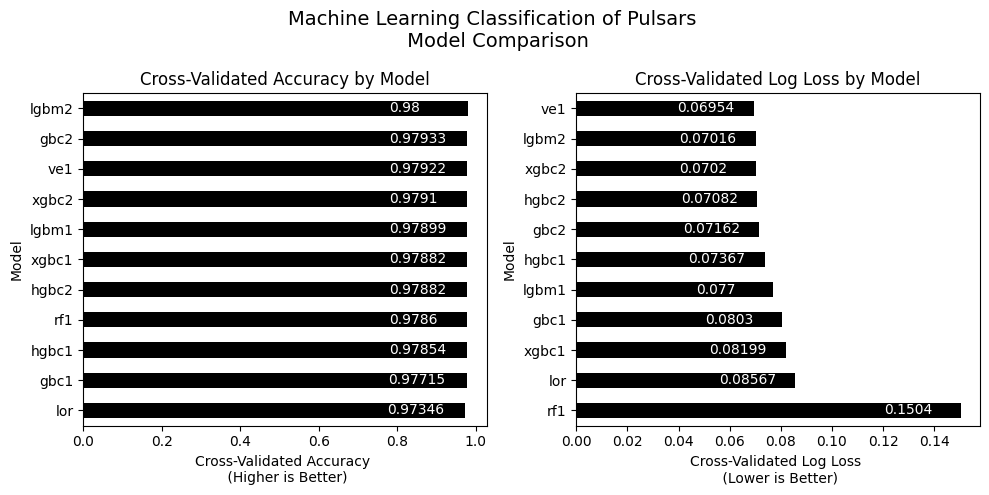

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated Accuracy,Cross-Validated Log Loss
0,Logistic Regression,lor,"Default, Scaled",0.936364,0.751825,0.834008,0.973461,0.085675
1,Random Forest,rf1,"Default, Scaled",0.943089,0.846715,0.892308,0.978601,0.150404
2,Gradient Boosting,gbc1,"Default, Scaled",0.902985,0.883212,0.892989,0.977148,0.080304
3,Histogram-Based Gradient Boosting,hgbc1,"Default, Scaled",0.906977,0.854015,0.879699,0.978545,0.073667
4,XGBoost,xgbc1,"Default, Scaled",0.944000,0.861314,0.900763,0.978824,0.081990
5,Light Gradient Boosted Machine,lgbm1,"Default, Scaled",0.914729,0.861314,0.887218,0.978992,0.077004
6,Gradient Boosting,gbc2,"Tuned, Scaled",0.934959,0.839416,0.884615,0.979327,0.071620
7,Histogram-Based Gradient Boosting,hgbc2,"Tuned, Scaled",0.937008,0.868613,0.901515,0.978824,0.070817
8,XGBoost,xgbc2,"Tuned, Scaled",0.935484,0.846715,0.888889,0.979104,0.070204
9,Light Gradient Boosted Machine,lgbm2,"Tuned, Scaled",0.923664,0.883212,0.902985,0.979998,0.070159


In [95]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot the horizontal bar chart for 'Cross-Validated Accuracy'
ax1 = cross_val_tab.plot(
    kind='barh',
    x='Model Alias',
    y='Cross-Validated Accuracy',
    ax=axes[0],
    color='black',
    legend=False  # Remove the legend
)
ax1.set_xlabel('Cross-Validated Accuracy \n (Higher is Better)')
ax1.set_ylabel('Model')
ax1.set_title('Cross-Validated Accuracy by Model')

# Annotate the values on the bars for 'Cross-Validated Accuracy'
for i, v in enumerate(cross_val_tab['Cross-Validated Accuracy']):
    ax1.text(v - 0.2, i, str(round(v, 5)), va='center', color='white')

# Plot the horizontal bar chart for 'Log Loss'
ax2 = log_loss_tab.plot(
    kind='barh',
    x='Model Alias',
    y='Cross-Validated Log Loss',
    ax=axes[1],
    color='black',
    legend=False  # Remove the legend
)
ax2.set_xlabel('Cross-Validated Log Loss \n (Lower is Better)')
ax2.set_ylabel('Model')
ax2.set_title('Cross-Validated Log Loss by Model')

# Annotate the values on the bars for 'Log Loss'
for i, v in enumerate(log_loss_tab['Cross-Validated Log Loss']):
    ax2.text(v - 0.03, i, str(round(v, 5)), va='center', color='white')  # Adjust the position to the left of the bar
    
# Add a suptitle for the entire figure
plt.suptitle('Machine Learning Classification of Pulsars \n Model Comparison', fontsize=14)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
models_table

This cross-validated accuracy ranking shows that the standalone LGBM2 model achieved the highest Cross-Validated Accuracy, followed by GBC2. However, when we combined LGBM2, XGBC2, HGBC2, and GBC2 into a voting ensemble (VE1), it performed competitively, ranking third in terms of accuracy.

In terms of Cross-Validated Log Loss, the voting ensemble (VE1) outperformed all other models, achieving the lowest log loss. This indicates the ensemble's superior predictive capabilities. LGBM2 followed as the second-best model in terms of log loss, while GBC2 ranked the third in this aspect.

The results highlight the **value of ensembling diverse models**, as it can provide a **balanced and robust approach**. The voting ensemble's strong performance in log loss and competitive accuracy suggests its effectiveness in combining the strengths of different models to deliver more accurate probability estimates. 

## 6.2 Features Importance

After developing a model, Feature Importance is a valuable tool that helps us understand the significance of each feature (or input variable) in making predictions. It provides insights into the following:

1. **Identifying Key Predictors**: Feature Importance helps us pinpoint which features have the most impact on the model's predictions. Features with higher importance values are more influential in determining the outcome.

2. **Interpretability**: Feature Importance aids in making the model more interpretable. It allows us to explain to stakeholders or end-users which factors are driving the model's decisions.

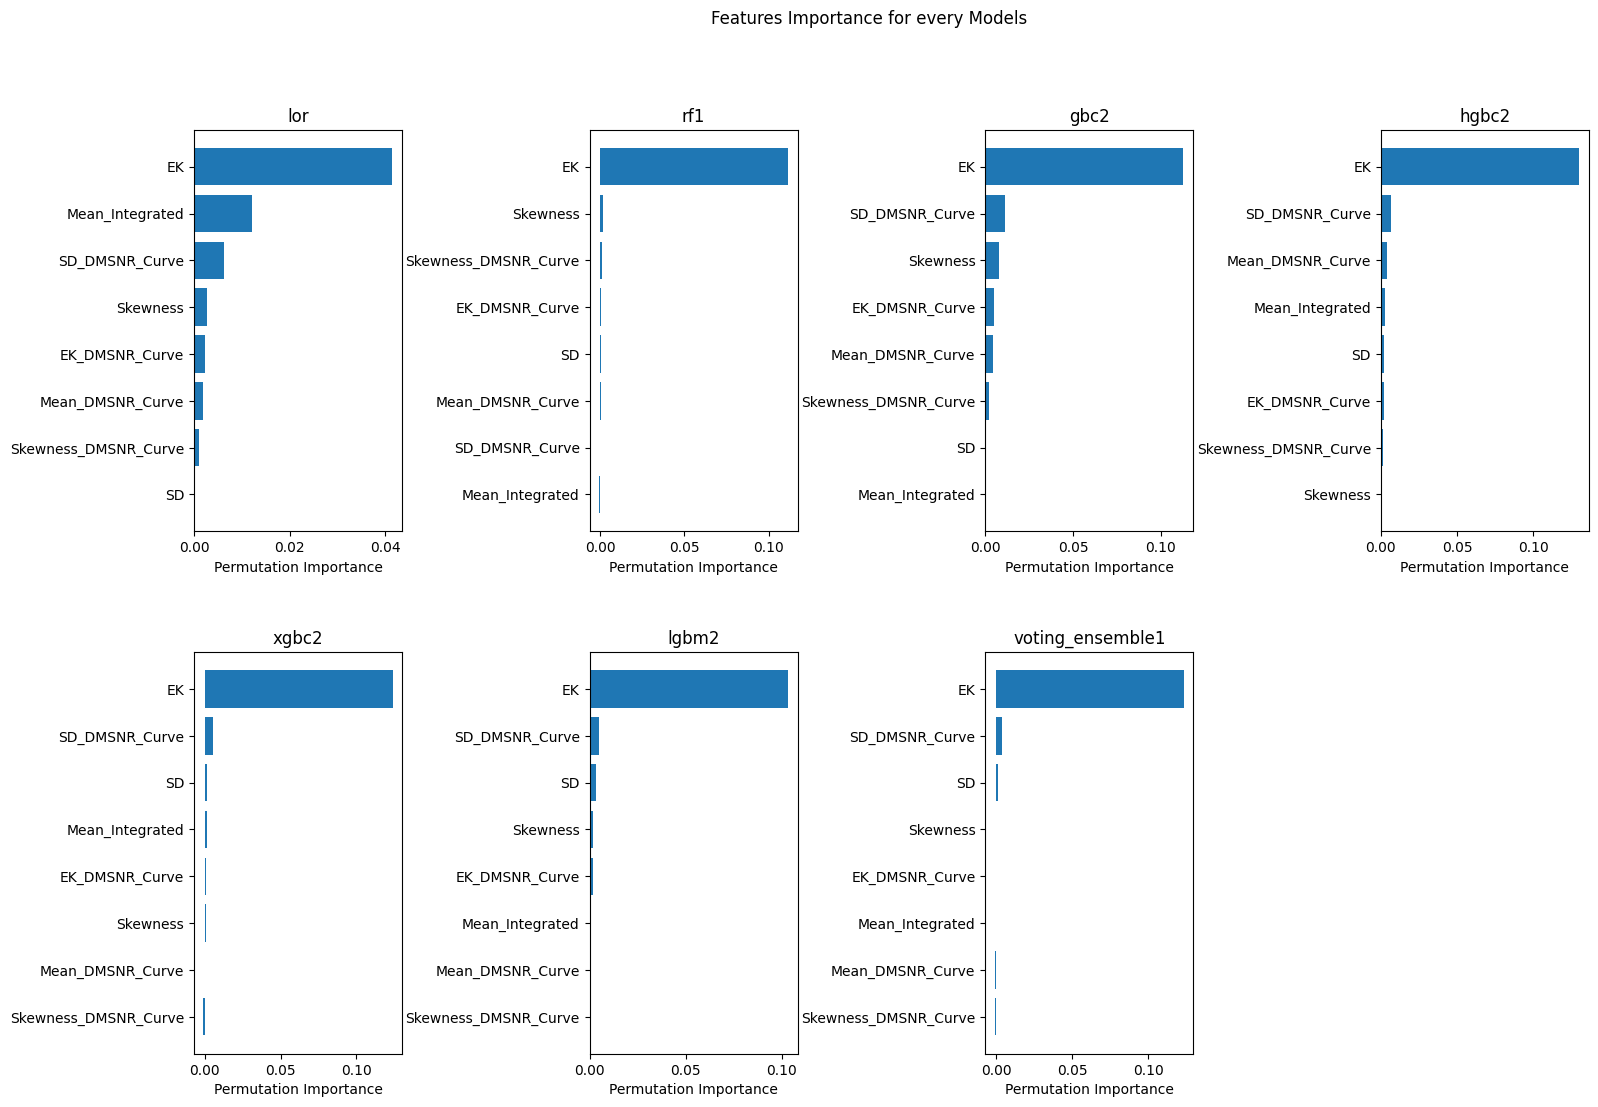

In [148]:
models_list = [lor, rf1, gbc2, hgbc2, xgbc2, lgbm2, voting_ensemble1]
models_list_title = ['lor', 'rf1', 'gbc2', 'hgbc2', 'xgbc2', 'lgbm2', 'voting_ensemble1']

# Define the number of rows and columns for the subplots
n_rows = 2  # Adjust this as needed
n_cols = 4  # Adjust this as needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.9, hspace=0.3)

# Iterate through the models and calculate permutation importances
for i, model in enumerate(models_list):
    if i >= n_rows * n_cols:  # Stop when there are no more subplots available
        break

    perm_importance = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=0)

    # Get feature names
    feature_names = x_test.columns

    # Calculate mean importance
    mean_importance = perm_importance.importances_mean

    # Sort feature indices by importance
    sorted_idx = mean_importance.argsort()

    # Determine the subplot location based on the current index
    row_index = i // n_cols
    col_index = i % n_cols

    # Plot permutation importance in the appropriate subplot
    axes[row_index, col_index].barh(range(len(sorted_idx)), mean_importance[sorted_idx], align='center')
    axes[row_index, col_index].set_yticks(range(len(sorted_idx)))
    axes[row_index, col_index].set_yticklabels([feature_names[i] for i in sorted_idx])
    axes[row_index, col_index].set_xlabel('Permutation Importance')
    axes[row_index, col_index].set_title(models_list_title[i])

# Remove any remaining empty subplots
for i in range(len(models_list), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Show the subplots
plt.suptitle("Features Importance for every Models")
plt.show()


Looking at the Feature Importance plot, it's clear that all the models agree that the `EK` feature as the most important one for making predictions in each model.

## 6.3 AUC-ROC Curve

The AUC-ROC curve (Area Under the Receiver Operating Characteristic curve) is a graphical representation used to assess and compare the performance of classification models, such as binary classifiers. 

1. **Receiver Operating Characteristic (ROC) Curve**: The ROC curve is a graph that displays the performance of a classification model across various classification thresholds. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at different threshold values. The curve shows how well the model distinguishes between the positive and negative classes.

2. **Area Under the Curve (AUC)**: AUC measures the overall performance of a model. It represents the area under the ROC curve. A perfect model has an AUC of 1, while a random model has an AUC of 0.5. The closer the AUC is to 1, the better the model's ability to discriminate between the two classes.

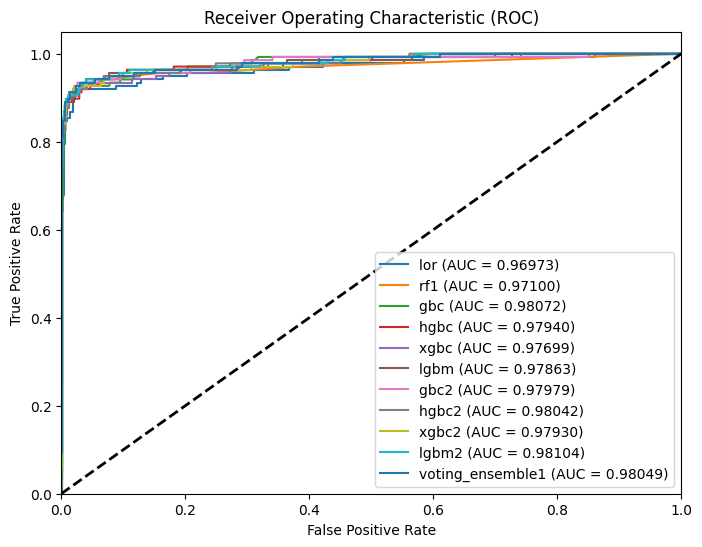

In [155]:
from sklearn.metrics import roc_curve, auc

models_list = [lor, rf1, gbc1, hgbc1, xgbc1, lgbm1, gbc2, hgbc2, xgbc2, lgbm2, voting_ensemble1]
models_list_title = ['lor', 'rf1', 'gbc', 'hgbc', 'xgbc', 'lgbm','gbc2', 'hgbc2', 'xgbc2', 'lgbm2', 'voting_ensemble1']

# Create an empty list to store AUC values
auc_values = []

# Define classes and labels here
# For example: classes = [0, 1]

# Create a figure and axis for the ROC plot
plt.figure(figsize=(8, 6))

# Iterate through the models
for i, model in enumerate(models_list):
    # Get model predictions
    y_score = model.predict_proba(x_test)[:, 1]  # Adjust if necessary
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve with model name from models_list_title
    plt.plot(fpr, tpr, label=f'{models_list_title[i]} (AUC = {roc_auc:.5f})')
    
    # Store AUC value
    auc_values.append(roc_auc)

# Set plot properties
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [156]:
# Print AUC values
for i, auc_val in enumerate(auc_values):
    print(f'{models_list_title[i]}: AUC = {auc_val:.5f}')

lor: AUC = 0.96973
rf1: AUC = 0.97100
gbc: AUC = 0.98072
hgbc: AUC = 0.97940
xgbc: AUC = 0.97699
lgbm: AUC = 0.97863
gbc2: AUC = 0.97979
hgbc2: AUC = 0.98042
xgbc2: AUC = 0.97930
lgbm2: AUC = 0.98104
voting_ensemble1: AUC = 0.98049


The AUC values serve as a measure of how well each model can classify data. Models with higher AUC values excel in distinguishing between different classes. In our case, all of our models demonstrate strong AUC values, signifying their effectiveness in distinguishing between the classes. 

## 6.4 Confusion Matrix

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It helps us understand how well our model is making predictions by comparing the actual and predicted values.

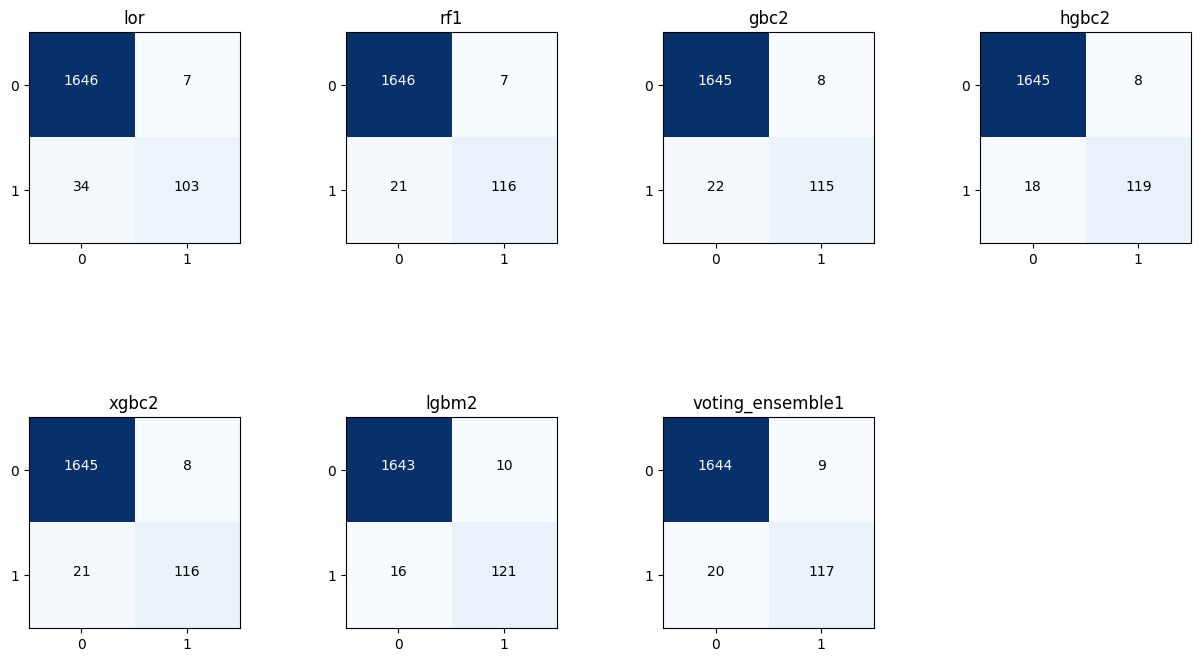

In [189]:
models_list = [lor, rf1, gbc2, hgbc2, xgbc2, lgbm2, voting_ensemble1]
models_list_title = ['lor', 'rf1', 'gbc2', 'hgbc2', 'xgbc2', 'lgbm2', 'voting_ensemble1']

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0)

for i, model in enumerate(models_list):
    # Predict using the model
    predict = model.predict(x_test)
    
    # Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_test, predict, labels=[0, 1])
    
    # Determine the subplot location based on the current index
    row_index = i // n_cols
    col_index = i % n_cols
    
    # Plot the confusion matrix in the appropriate subplot
    axes[row_index, col_index].imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    axes[row_index, col_index].set_title(models_list_title[i])
    tick_marks = np.arange(2)
    axes[row_index, col_index].set_xticks(tick_marks)
    axes[row_index, col_index].set_yticks(tick_marks)
    #axes[row_index, col_index].set_xticklabels(['Not Pulsar', 'Pulsar'])
    #axes[row_index, col_index].set_yticklabels(['Not Pulsar', 'Pulsar'])
    thresh = cnf_matrix.max() / 2.0
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        axes[row_index, col_index].text(j, i, format(cnf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

# Remove any remaining empty subplots
for i in range(len(models_list), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Show the subplots
plt.show()

|           | Predicted Negative (0 - Not Pulsar) | Predicted Positive (1 - Pulsar) |
|-----------|-----------------------------------|-------------------------------|
| Actual Negative (0 - Not Pulsar) | True Negatives (TN)             | False Positives (FP)          |
| Actual Positive (1 - Pulsar) | False Negatives (FN)            | True Positives (TP)           |



Lets take confusion matrix for voting_ensemble1. 

**Interpretation of the Confusion Matrix**:

**True Positives (TP)**: We correctly identified 117 pulsar candidates. This shows the model's ability to accurately detect true positives.

**False Positives (FP)**: There were 9 false positives, where the model mistakenly classified non-pulsars as pulsar candidates. These could be potential false alarms.

**False Negatives (FN)**: We missed 20 actual pulsar candidates, misclassifying them as non-pulsars. This indicates cases where the model failed to identify true pulsars.

**True Negatives (TN)**: The model correctly classified 1644 non-pulsar candidates. This demonstrates its ability to accurately identify non-pulsars.


# 7. Summary

1. **Data Preparation:**
   - Before building and training machine learning models, thorough data preparation was conducted. This involved tasks such as data cleaning, handling missing values, and data standardization to create a high-quality dataset for modeling. Pipelines were constructed to enable the automation of the entire machine learning workflow.

2. **Classifier Development:**
   - Multiple classification models were developed to identify pulsar candidates. These models included a variety of algorithms, such as Logistic Regression, Random Forest, Gradient Boosting, Histogram Gradient Boosting, XGBoost, and Light Gradient Boosting Machine (LGBM).

3. **Hyperparameter Tuning:**
   - To optimize model performance, hyperparameter tuning was carried out using techniques like Randomized Search CV. This process involved finding the best set of hyperparameters for each model to enhance their predictive capabilities.

4. **Cross-Validation:**
   - The accuracy and log loss of the models were rigorously validated through 5-fold cross-validation. This technique helped ensure that the models were capable of generalizing their predictions to unseen data, reducing the risk of overfitting.

5. **Ensemble Model Development:**
   - An ensemble model was created to leverage the strengths of multiple individual models. This ensemble used a soft voting mechanism, combining the predictions of Gradient Boosting, Histogram Gradient Boosting, XGBoost, and LGBM. Such ensembles often result in a more robust and accurate final prediction.

6. **Model Evaluation:**
   - The models' performance was assessed using a variety of evaluation metrics, including precision, recall, F1 score, log loss, and accuracy. These metrics provided a comprehensive view of how well the models classified pulsar candidates.

7. **Confusion Matrices and AUC-ROC Curves:**
   - In addition to traditional metrics, confusion matrices and AUC-ROC curves were generated. Confusion matrices helped in understanding the true positives, true negatives, false positives, and false negatives, while AUC-ROC curves illustrated the trade-off between true positive rate and false positive rate, providing insights into the models' capabilities on distinguishing different classes.

8. **Key Takeaways:**
   - The gradient boosting algorithms consistently outperformed baseline models in terms of accuracy and log loss. This indicates that these algorithms were well-suited for the task of identifying pulsar candidates.
   - The soft voting ensemble model, which combined the predictions of multiple gradient boosting models, enhanced diversity and generalization, leading to improved overall model performance and robustness.
   
 

# 8. Recommendation

1. **Collect More Training Data:**
   - To enhance the performance of our pulsar classification models, it's crucial to collect a more extensive and balanced training dataset. Pulsar candidates can be relatively rare, and imbalanced datasets may lead to biased model predictions. A larger, more balanced dataset will improve the models' ability to detect pulsars accurately.

2. **Feature Engineering:**
   - Explore advanced feature engineering techniques to extract more meaningful information from the signal data of pulsars. Consider the mathematical characteristics of pulsar signals and how they can be translated into informative features for our models. This may involve time-domain and frequency-domain analysis, autocorrelation, Fourier transforms, and other signal processing techniques.

# 9. References

Choquenaira Florez, A. Y., Sanchez Vinces, B. V., Roca Arroyo, D. C., Chire Saire, J. E., & Franco, P. B. (2020). Machine learning pipeline for pulsar star dataset. arXiv preprint arXiv:2005.01208.

Debesai, S., Gutierrez, C., & Koyluoglu, N. U. (2020). Application of machine learning methods to identify and categorize radio pulsar signal candidates. Retrieved from https://cs229.stanford.edu/proj2020spr/report/Debesai_Gutierrez_Koyluoglu.pdf

Dincer, B. (2020). Pulsar classification for class prediction [Data set]. Kaggle. https://www.kaggle.com/datasets/brsdincer/pulsar-classification-for-class-prediction/data

Lin, H., Li, X., & Luo, Z. (2020). Pulsar detection by machine learning with very few features. Monthly Notices of the Royal Astronomical Society, 000(1), 1-13. https://arxiv.org/pdf/2002.08519v1.pdf.

---

### THANK YOU FOR REVIEWING MY NOTEBOOK!

Your feedback is highly appreciated. If you have any questions, suggestions, or would like to collaborate, please feel free to contact me:

- **LinkedIn**: [https://www.linkedin.com/in/hazmannaim/](https://www.linkedin.com/in/hazmannaim/)
- **GitHub**: [https://github.com/HazmanNaim](https://github.com/HazmanNaim)
- **Kaggle**: [https://www.kaggle.com/hazmannaim](https://www.kaggle.com/hazmannaim)

Thank you for your time and interest in my work. Your input is valuable, and I look forward to connecting with you.